Goal: Create a program to study the consequences of establishing habitat corridors between habitat patches

Your framework will have three classes: Individual, Population, and Landscape. Individuals exist in populations and populations exist in landscapes.

In every time step, individuals can stay in the population where they started or move to a new population, the probability of which is stored in a dispersal matrix.

Individuals need to have: phenotype attribute

Populations need: list of individuals
    Constructor to create new list for ind in pop
    Methods to add and remove ind
    Calc and print the freq of phenotypes among ind
    
Lanscapes need: list of populations, dispersal matrix
    Constructor to create new list for populations in that landscape
    Method to use probabilities in dispersal matrix to determine if ind moves or stays each time

Dispersal matrix - consists of the probabilities that an ind moves populations or stays in place each time step. 
    For this species (Warbling Babblers) this corresponds to the possibility of moving in a week
    If an ind moves pops, remove it from the list of ind in the pop it started in and add it to the list in the pop it goes to
        Do not modify a list that you are looping through inside of the loop itself, do it once the loop is complete
    
Notes:
    Population or landscape constructors should set the starting population sizes
    Total number of ind across all populations should stay constant, but ind pops change sizes
    
When simulation begins, all ind in a population should have the same phenotype. As ind move between pop through time steps (weeks), track the trajectory of phenotype freq and pop sizes
    Will need to write a function to create these plots, either as a method of one of the classes or independent 
    Can overlay pt freq or pop sizes for diff pop on a single plt for easy comparison 

In [1]:
#Import any needed modules
import random
import matplotlib.pyplot as plt
import numpy as np

Individual class notes:
Needs at minimum a phenotype attribute

In [2]:
#Create individual class, with each individual having a phenotype attribute
class individual:
    """Class to hold information about individuals"""
    
    #Create constructor to construct individuals
    def __init__(self,id,pt):
        """Used to create individuals and assign them an id and phenotype(pt)"""
        
        self.id = id
        self.pt = pt

Population class notes:
Needs at minimum a list of individuals

In [3]:
#Create population class
class population:
    """Class to hold information about populations"""
    
    #Create constructor to create lists of individuals in the population, defaulting to a population size of 10 and a brown phenotype
    def __init__(self,pt="brown",popSize=10,popnum=1):
        """Creates list of individuals in the population"""
        
        self.popSize = popSize
        self.popnum = popnum
        
        #Create list of individuals in each population (0 and 1)
        self.indPop = []
        
        #Create lists to add and remove individuals later
        self.addTo = []
        self.removeFrom = []
        
        
        #Create individuals and add them to the population list
        for num in range(popSize):
            self.indPop.append(individual(id=num,pt=pt))
    

    #Method to calculate and print the frequency of phenotypes in the population
    def calcPtFreq(self):
        """Calculates the frequency of phenotypes in the population"""
        
        #Update population size
        totalPop = len(self.indPop)

        #Create counts of ind with particular phenotypes - bn for brown and wt for white
        bn = 0
        wt = 0
        #Calculate the number of ind with the brown phenotype
        for ind in self.indPop:
            if ind.pt == "brown":
                bn += 1
            #Calculate the number of ind with the white phenotype
            if ind.pt == "white":
                wt += 1
        
        #Calculate frequencies
        bnf = bn / totalPop
        wtf = wt / totalPop
        
        
        #Return the data 
        return (totalPop,bnf,wtf)
        


Landscape class notes:
Need at minimum a list of populations and a dispersal matrix

Dispersal matrix stores probabilities that an individual disperses or stays in place
    May be useful to use the random.choices


In [11]:
#Create landscape class
class landscape:
    """Class to hold information about landscapes"""
    
    #Create constructor to create list of populations in that landscape, and assign each population an id
    def __init__(self,pt="brown",id=1,popnum=1):
    
        self.id = id
        self.popnum = popnum

        #create list of populations in that landscape
        self.popList = []
        
        #Create the dispersal matrix, with a .8 chance ind in pop1 will not move, a a.2 chance ind in pop1 will move to pop2
        #a .7 chance ind in pop2 will not move, and a .3 chance ind in pop2 will move to pop1
        self.dispMatrix =[[0.8,0.2],
                           [0.3,0.7]]

        #Set phenotypes
        ptList = ["white","brown"]
        
        #Create populations and add them to the list
        for num in range(popnum):
            self.popList.append(population(pt=ptList[num],popnum=num))
        
    #methods to use the dispersal matrix to move individuals
    def move(self):
        """Uses the probability matrix to move inidividuals between populations"""
        
        #Loop through each population
        for i in range(len(self.popList)):
            pop=self.popList[i]
            for ind in pop.indPop:
                #addTo=self.addTo
                #removeFrom=self.removeFrom
                newPop = random.choices(self.popList,self.dispMatrix[i])
                #Add individuals that move to queue to be added and removed from the relevant populations
                if newPop != pop:
                    pop.removeFrom.append(ind)
                    pop.addTo.append(ind)
        
        #For each population
        for i in range(len(self.popList)):
            for pop in self.popList:
                #If there is an individual in both removePop and indPop, remove it from the population
                if pop.removeFrom == pop.indPop:
                    for ind in pop.removeFrom:
                        pop.indPop.remove(ind)
                #If there is an individual on addTo but not in the population, add it
                for ind in pop.addTo:
                    if i == 0:
                        self.popList[1].indPop.append(ind)
                    if i == 1:
                        self.popList[0].indPop.append(ind)
                #addTo != indPop:
                 #   indPop.append(ind)
                                                        
        #Call on calcPtFreq method to get all data together
        for pop in self.popList:
            pop.calcPtFreq()
        
    
    def makePlots(self,P1size,P2size,P1bnf,P2bnf,P1wtf,P2wtf):
        """Method for making plots of phenotype frequency and population size change over time"""
            
        #Create figure for plots
        plt.figure(figsize=(20,4))
        
        #Create plot for frequency of the brown phenotype
        plt.subplot(131)
        plt.plot(P1bnf,'^',markersize=3)
        plt.plot(P2bnf,'o',markersize=3)
        plt.ylabel("Frequency of the brown phenotype")
        plt.xlabel("Weeks")
        
        #Create plot for frequency of the white phenotype over time
        plt.subplot(132)
        plt.plot(P1wtf,'^',markersize=3)
        plt.plot(P2wtf,'o',markersize=3)
        plt.ylabel("Frequency of the white phenotype")
        plt.xlabel("Weeks")

        #create plot for population size over time
        plt.subplot(133)
        plt.plot(P1size,'^',markersize=3)
        plt.plot(P2size,'o',markersize=3)
        plt.ylabel("Population Size")
        plt.xlabel("Weeks")


Create plots of phenotype frequency and population size over time (2 pops on same plot to save time)

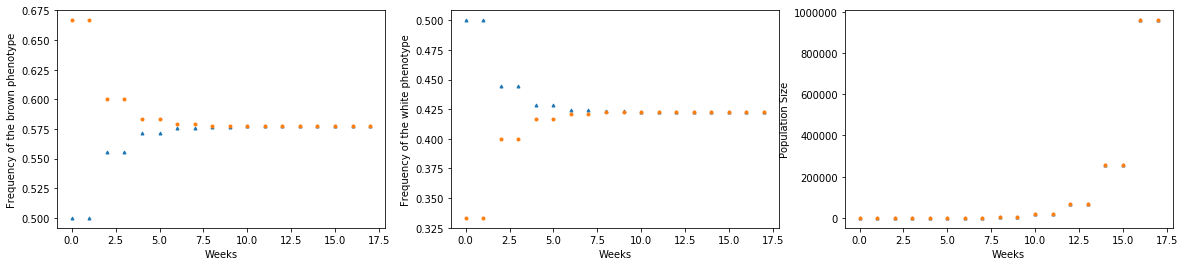

In [12]:
#Run code

#Create 2 populations of 10 individuals each, one with brown phenotype and one with white phenotype
OurLandscape = landscape(popnum=2)

#Create lists to store data to feed into makeplots function
size_1 = []
size_2 = []
bn_1 = []
bn_2 = []
wt_1 = []
wt_2 = []

#Run probabilities of moving for 10 weeks for both populations in the landscape we created
for num in range (1,10):
    OurLandscape.move()
    #for each population add the relevant data to the relevant list (created above)
    for i in range(len(OurLandscape.popList)):
        for pop in OurLandscape.popList:
            if i == 0:
                vals = OurLandscape.popList[0].calcPtFreq()
                size_1.append(vals[0])
                bn_1.append(vals[1])
                wt_1.append(vals[2])
            if i == 1:
                vals = OurLandscape.popList[1].calcPtFreq()
                size_2.append(vals[0])
                bn_2.append(vals[1])
                wt_2.append(vals[2])
    
#Make plots
OurLandscape.makePlots(size_1,size_2,bn_1,bn_2,wt_1,wt_2)

QUESTIONS and SIMULATIONS:
1. How do the frequencies of phenotypes change in each population week-by-week as individuals move?
      As individuals move, the frequency of each particular phenotype in each population converge such that after some amount of time, the frequency of the phenotype in question is the same in both populations. 
      
      
2. What effect does an overall increase in the rate of movement (migration) have?
    An increased rate of migration (done by adjusting the values in the dispersal matrix) leads to the equalization of phenotype frequencies in a shorter amount of time.


3. What happens to both phenotype frequencies and population sizes when movement probabilities are not symmetric (individuals have a higher probability of moving from population A to population B, than they do of moving from population B to population A)?
    The rate of change in both phenotype frequencies and population size will be asymmetric, with more individuals moving into one population more often than the other. This can be tested by adjusting the values in the dispersal matrix.


4. What effect does changing the starting population sizes have on the trajectory of phenotype frequencies? In other words, what might happen if you connect big habitat patches versus small habitat patches?
    When connecting large habitats (simulated by increasing population size), there is a longer amount of time before phenotype frequencies converge and become equal. When connecting smaller habitats (simulated by decreasing population size), the smaller number of individuals means that these frequencies will converge sooner. 